# XFOIL

## Overview

XFOIL is a design and analysis tool for subsonic airfoils developed by Mark Drela at MIT.

The [XFOIL website](https://web.mit.edu/drela/Public/web/xfoil/) contains more info.

## Setup

As with the previous AVL tutorial, a copy of the XFOIL executable must be somewhere on your computer in order to use it with AeroSandbox.

Download a copy of the executable from the [XFOIL website](https://web.mit.edu/drela/Public/web/xfoil/) for your operating system. Place it anywhere on your computer, and remember the filepath to the executable.

## Running XFOIL from AeroSandbox

First, we'll do some imports. We'll also do some stuff that is only necessary for this tutorial to run correctly in a browser - ignore this following code block. (Basically, it's to make unit testing of tutorials happy.)

In [5]:
import aerosandbox as asb
import aerosandbox.numpy as np
from shutil import which

xfoil_is_present = which('xfoil') is not None

Next, we'll define an airfoil to analyze:

In [6]:
airfoil = asb.Airfoil("dae51")


And draw it:

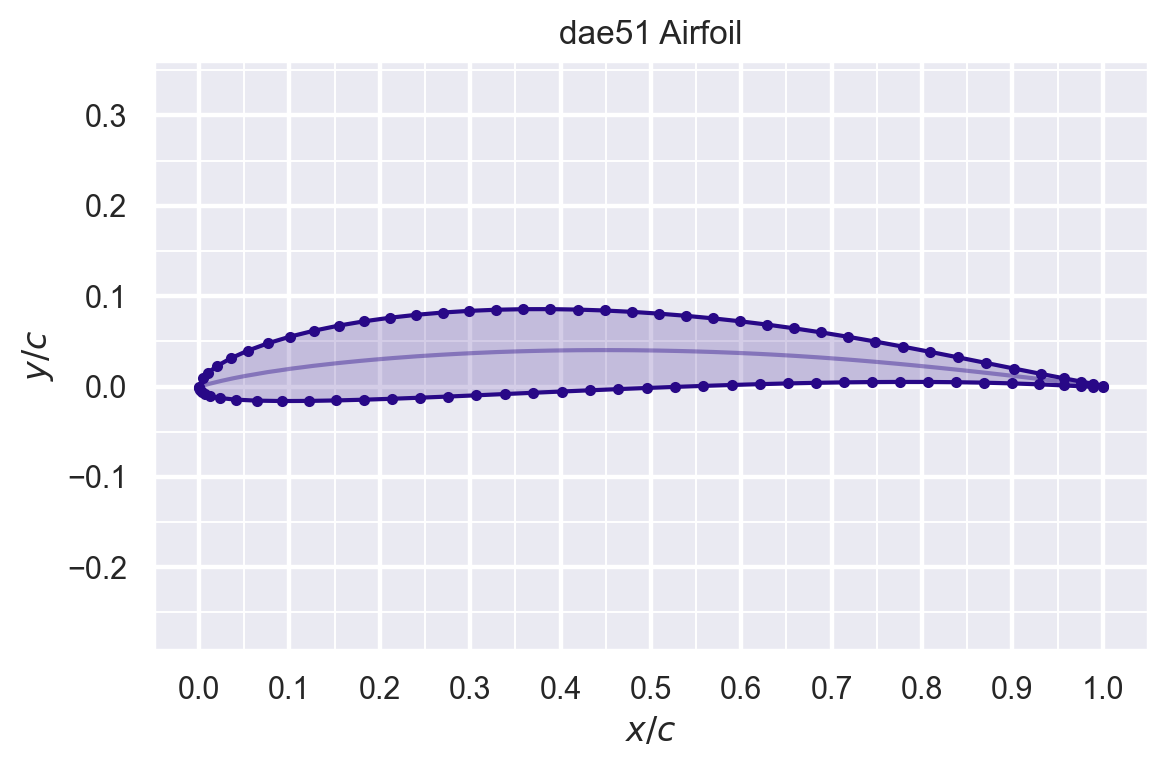

In [7]:
from aerosandbox.tools.pretty_plots import plt, show_plot, set_ticks  # sets some nice defaults

airfoil.draw(show=False)
set_ticks(0.1, 0.05, 0.1, 0.05)
show_plot()

Now, let's analyze it:

In [8]:
if xfoil_is_present:  # Ignore this; just for tutorial purposes.

    analysis = asb.XFoil(
        airfoil=airfoil,
        Re=3e5,
        xfoil_command="xfoil",
        # If XFOIL is not on your PATH, then set xfoil_command to the filepath to your XFOIL executable.
    )

    point_analysis = analysis.alpha(
        alpha=3
    )

    from pprint import pprint

    print("\nPoint analysis:")
    pprint(point_analysis)

    sweep_analysis = analysis.alpha(
        alpha=np.linspace(0, 15, 6)
    )
    print("\nSweep analysis:")
    pprint(sweep_analysis)

    cl_analysis = analysis.cl(
        cl=1.2
    )
    print("\nFixed-CL analysis:")
    pprint(cl_analysis)


Point analysis:
{'CD': array([0.00873]),
 'CDp': array([0.00318]),
 'CL': array([0.8065]),
 'CM': array([-0.1026]),
 'alpha': array([3.]),
 'xtr_lower': array([1.]),
 'xtr_upper': array([0.6764])}

Sweep analysis:
{'CD': array([0.008  , 0.00873, 0.01112, 0.02211, 0.04114, 0.08114]),
 'CDp': array([0.00319, 0.00318, 0.00522, 0.01426, 0.03433, 0.07667]),
 'CL': array([0.4719, 0.8065, 1.1205, 1.3277, 1.4138, 1.3851]),
 'CM': array([-0.1039, -0.1026, -0.0987, -0.0819, -0.0568, -0.0459]),
 'alpha': array([ 0.,  3.,  6.,  9., 12., 15.]),
 'xtr_lower': array([1., 1., 1., 1., 1., 1.]),
 'xtr_upper': array([0.7891, 0.6764, 0.4618, 0.0438, 0.0213, 0.017 ])}

Fixed-CL analysis:
{'CD': array([0.01303]),
 'CDp': array([0.00666]),
 'CL': array([1.2]),
 'CM': array([-0.0957]),
 'alpha': array([6.902]),
 'xtr_lower': array([1.]),
 'xtr_upper': array([0.3296])}


We can use this to plot polars:

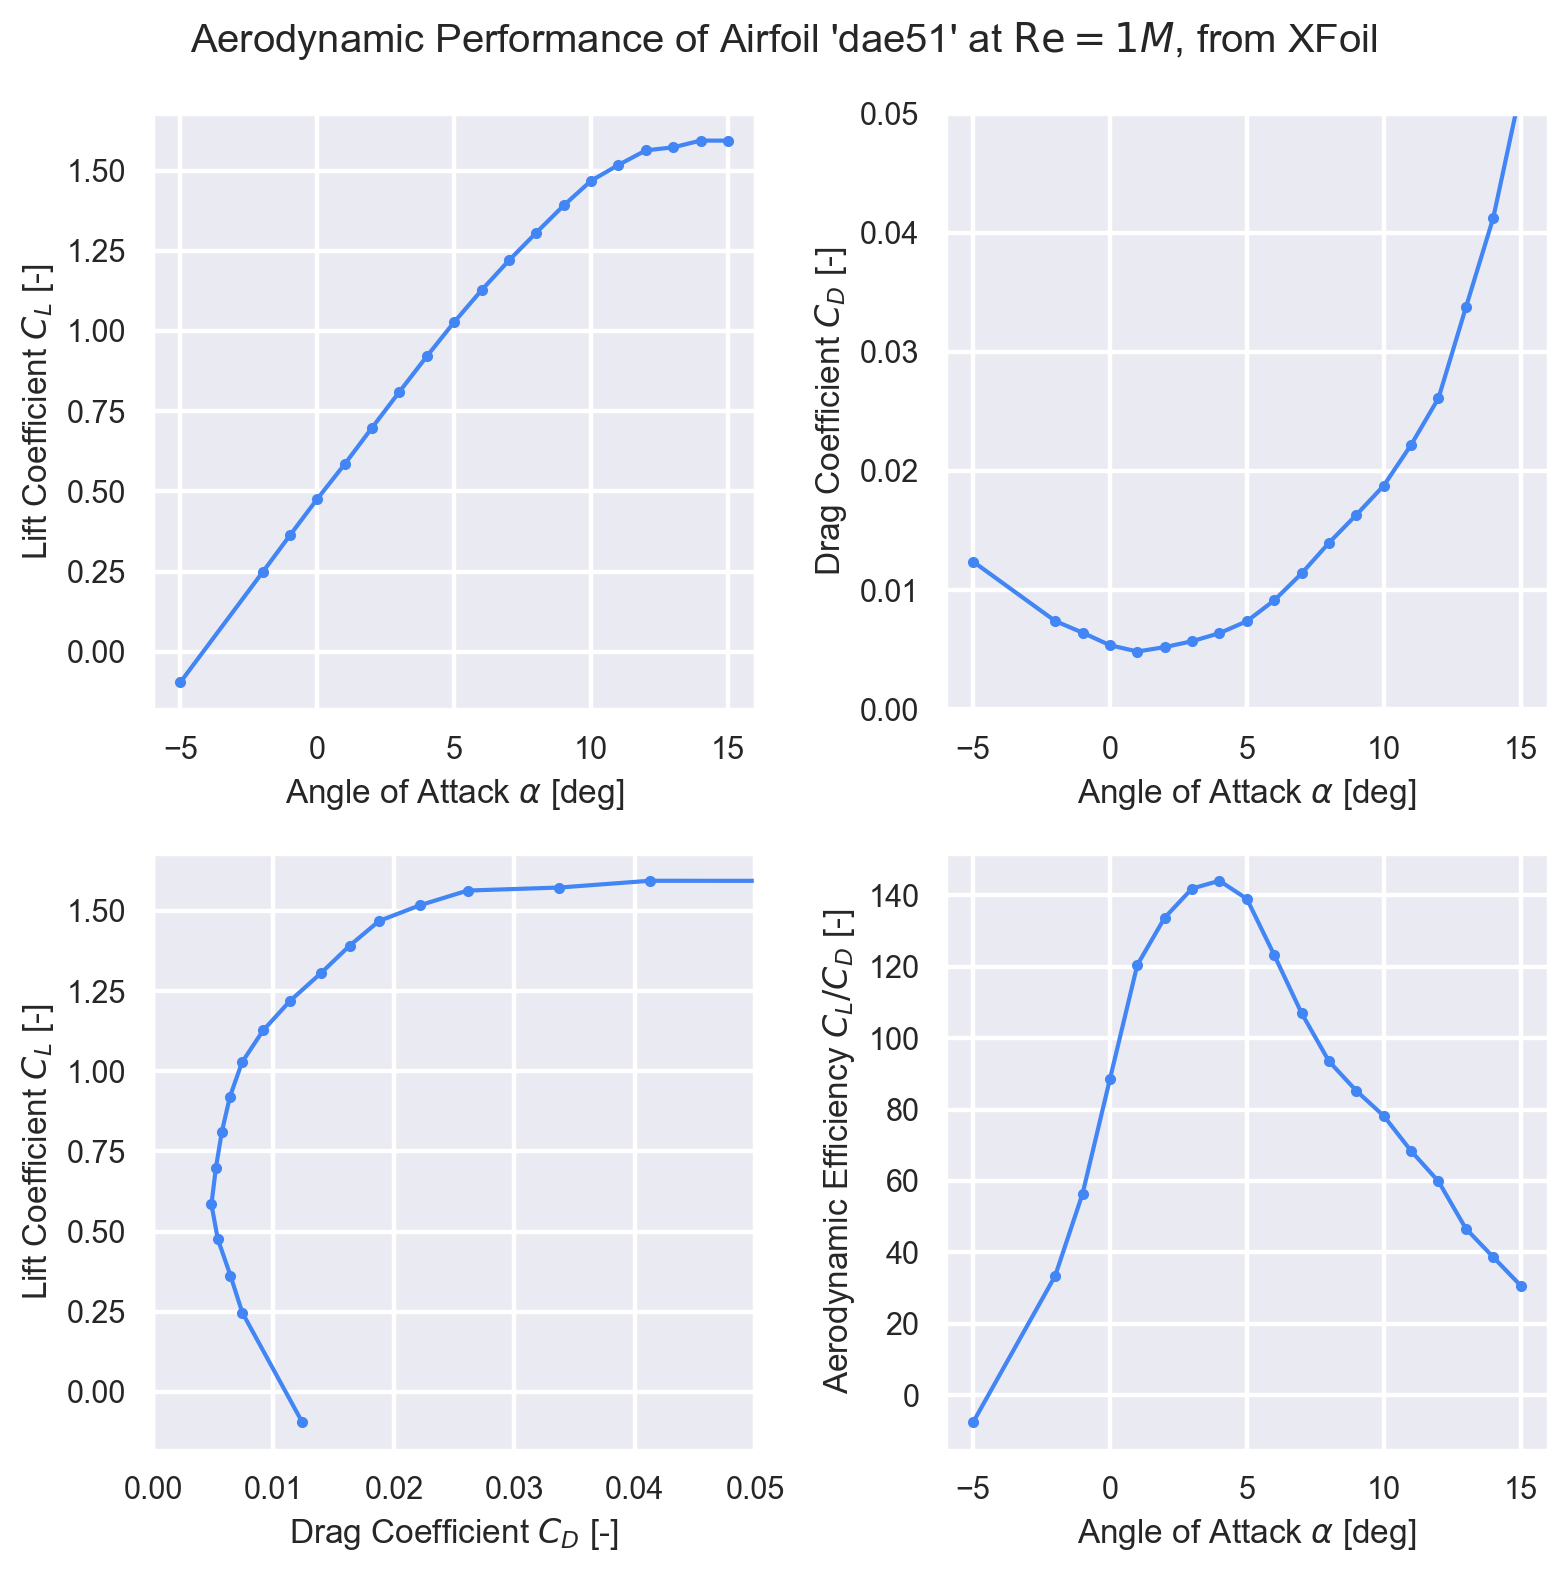

In [16]:
if xfoil_is_present:  # Ignore this; just for tutorial purposes.

    fig, ax = plt.subplots(2, 2, figsize=(8, 8))
    Re = 1e6
    alpha_inputs = np.linspace(-15, 15, 31)
    xf_run = asb.XFoil(airfoil, Re=Re, max_iter=20).alpha(alpha_inputs)
    xa = xf_run["alpha"]
    xCL = xf_run["CL"]
    xCD = xf_run["CD"]

    plt.sca(ax[0, 0])
    plt.plot(xa, xCL, ".-")
    plt.xlabel(r"Angle of Attack $\alpha$ [deg]")
    plt.ylabel(r"Lift Coefficient $C_L$ [-]")

    plt.sca(ax[0, 1])
    plt.plot(xa, xCD, ".-")
    plt.xlabel(r"Angle of Attack $\alpha$ [deg]")
    plt.ylabel(r"Drag Coefficient $C_D$ [-]")
    plt.ylim(0, 0.05)

    plt.sca(ax[1, 0])
    plt.plot(xCD, xCL, ".-")
    plt.xlabel(r"Drag Coefficient $C_D$ [-]")
    plt.ylabel(r"Lift Coefficient $C_L$ [-]")
    plt.xlim(0, 0.05)

    plt.sca(ax[1, 1])
    plt.plot(xa, xCL / xCD, ".-")
    plt.xlabel(r"Angle of Attack $\alpha$ [deg]")
    plt.ylabel(r"Aerodynamic Efficiency $C_L / C_D$ [-]")

    from aerosandbox.tools.string_formatting import eng_string

    show_plot(f"Aerodynamic Performance of Airfoil '{airfoil.name}' at $\\mathrm{{Re}}={eng_string(Re)}$, from XFoil")